# Laboratory exercise 4

## Warm-Up Mode (2 points)

**Task Description**  
Using the given dataset, develop and implement **3** different neural networks to predict the **air quality level**. Each network should differ in the following ways:  

- **layer configurations** - use different numbers and types of layers;
- **activation functions** - try different activation functions;
- **neurons per layer** - experiment with different numbers of neurons in each layer; and
- **number of layers** - build networks with varying depths.

After developing the models, evaluate and compare the performance of all **3** approaches.

**About the Dataset**  
This dataset focuses on air quality assessment across various regions. The dataset contains 5,000 samples and captures critical environmental and demographic factors that influence pollution levels.

**Features**:  
- **Temperature (°C)**: Average temperature of the region.  
- **Humidity (%)**: Relative humidity recorded in the region.  
- **PM2.5 Concentration (µg/m³)**: Levels of fine particulate matter.  
- **PM10 Concentration (µg/m³)**: Levels of coarse particulate matter.  
- **NO2 Concentration (ppb)**: Nitrogen dioxide levels.  
- **SO2 Concentration (ppb)**: Sulfur dioxide levels.  
- **CO Concentration (ppm)**: Carbon monoxide levels.  
- **Proximity to Industrial Areas (km)**: Distance to the nearest industrial zone.  
- **Population Density (people/km²)**: Number of people per square kilometer in the region.  

**Target Variable**: **Air Quality**  
- **Good**: Clean air with low pollution levels.  
- **Moderate**: Acceptable air quality but with some pollutants present.  
- **Poor**: Noticeable pollution that may cause health issues for sensitive groups.  
- **Hazardous**: Highly polluted air posing serious health risks to the population.  

In [1]:
!pip install tensorflow

  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.68.1-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached optre

In [3]:
import pandas as pd

In [5]:
df = pd.read_csv('pollution_dataset.csv')

In [7]:
df.head(10)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
5,39.4,96.6,14.6,35.5,42.9,17.9,1.82,3.1,674,Hazardous
6,41.7,82.5,1.7,15.8,31.1,12.7,1.80,4.6,735,Poor
7,31.0,59.6,5.0,16.8,24.2,13.6,1.38,6.3,443,Moderate
8,29.4,93.8,10.3,22.7,45.1,11.8,2.03,5.4,486,Poor
9,33.2,80.5,11.1,24.4,32.0,15.3,1.69,4.9,535,Poor


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [68]:
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OrdinalEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from sklearn.metrics import classification_report
import matplotlib.pyplot as pl

In [25]:
encoder = OrdinalEncoder(categories=[['Good', 'Moderate', 'Poor', 'Hazardous']])

In [27]:
df_copy = df.copy()

In [29]:
df_copy['Air Quality']=encoder.fit_transform(df[['Air Quality']])

In [31]:
df_copy.head(10)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,1.0
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,1.0
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,1.0
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,0.0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,0.0
5,39.4,96.6,14.6,35.5,42.9,17.9,1.82,3.1,674,3.0
6,41.7,82.5,1.7,15.8,31.1,12.7,1.80,4.6,735,2.0
7,31.0,59.6,5.0,16.8,24.2,13.6,1.38,6.3,443,1.0
8,29.4,93.8,10.3,22.7,45.1,11.8,2.03,5.4,486,2.0
9,33.2,80.5,11.1,24.4,32.0,15.3,1.69,4.9,535,2.0


<Axes: >

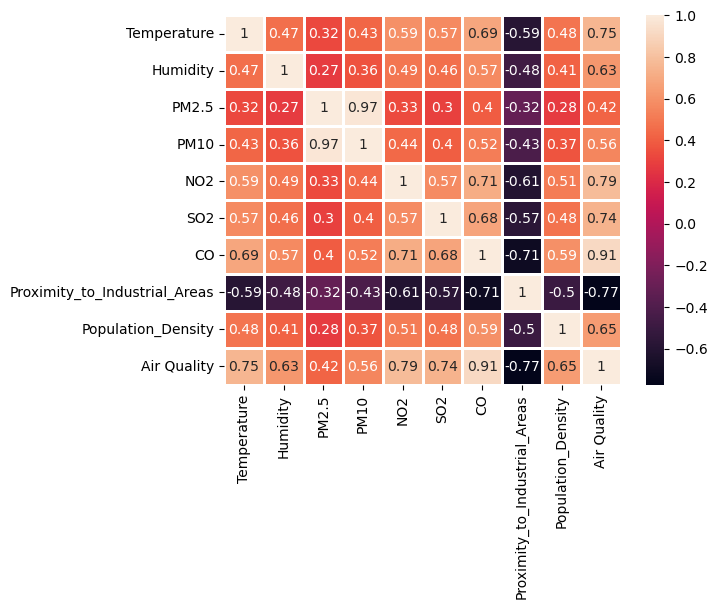

In [33]:
sns.heatmap(df_copy.corr(), annot=True, linewidths=2)

<Axes: xlabel='Air Quality', ylabel='count'>

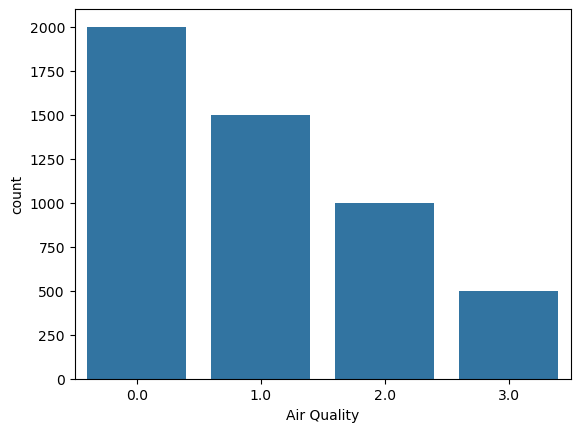

In [35]:
sns.countplot(df_copy, x='Air Quality')

In [37]:
X_data = df_copy.drop(columns=['Air Quality'], axis=1)
Y_data = df_copy['Air Quality']

In [39]:
train_X, test_X, train_y, test_y = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

In [41]:
scaler = StandardScaler()

In [43]:
train_X = scaler.fit_transform(train_X)

In [45]:
test_X = scaler.transform(test_X)

In [47]:
len(train_X[0])

9

In [55]:
model1 = Sequential()
model1.add(Dense(32, input_dim=9, activation='relu'))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(4,activation='sigmoid'))

C:\Users\Skipio\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
model2 = Sequential([
    Input(shape=(X_data.shape[1],)),
    Dense(64, activation='tanh', input_shape=(X_data.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='tanh'),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')
])

model3 = Sequential([
    Input(shape=(X_data.shape[1],)),
    Dense(128, activation='relu', input_shape=(X_data.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')
])

C:\Users\Skipio\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
from tensorflow.keras.optimizers import Adam
models = [model1, model2, model3]
for i, model in enumerate(models, 1):
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [71]:
model1.fit(train_X, train_y, epochs=200, batch_size=25)

Epoch 1/200
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 826us/step - accuracy: 0.9821 - loss: 0.0514
Epoch 2/200
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - accuracy: 0.9859 - loss: 0.0384
Epoch 3/200
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - accuracy: 0.9847 - loss: 0.0423
Epoch 4/200
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.9862 - loss: 0.0423
Epoch 5/200
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.9853 - loss: 0.0410
Epoch 6/200
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - accuracy: 0.9874 - loss: 0.0371
Epoch 7/200
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.9862 - loss: 0.0344
Epoch 8/200
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - accuracy: 0.9865 - loss: 0.0362
Epoch 9/200
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.9842 - loss: 0.0435
Epoch 10/200
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.9854 - loss: 0.0404
Epoch 11/200
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.9859 - loss: 0.0441
Epoch 12/200
160/16

In [73]:
model2.fit(train_X, train_y, epochs=100, batch_size=50)

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step - accuracy: 0.5747 - loss: 1.0066
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.8327 - loss: 0.4294
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.8900 - loss: 0.2810
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.9123 - loss: 0.2270
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.9286 - loss: 0.1936
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.9292 - loss: 0.1867
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.9260 - loss: 0.1914
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.9344 - loss: 0.1764
Epoch 9/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.9306 - loss: 0.1742
Epoch 10/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.9291 - loss: 0.1759
Epoch 11/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.9331 - loss: 0.1655
Epoch 12/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0

In [75]:
model3.fit(train_X, train_y, epochs=150, batch_size=34)

Epoch 1/150
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step - accuracy: 0.5824 - loss: 1.0343
Epoch 2/150
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.8707 - loss: 0.3179
Epoch 3/150
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.9043 - loss: 0.2290
Epoch 4/150
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - accuracy: 0.9201 - loss: 0.1984
Epoch 5/150
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.9236 - loss: 0.1881
Epoch 6/150
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - accuracy: 0.9345 - loss: 0.1669
Epoch 7/150
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - accuracy: 0.9298 - loss: 0.1658
Epoch 8/150
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.9442 - loss: 0.1469
Epoch 9/150
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - accuracy: 0.9402 - loss: 0.1574
Epoch 10/150
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.9477 - loss: 0.1324
Epoch 11/150
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.9496 - loss: 0.1263
Epoch 12/150
118/11

In [77]:
_, accuracy = model1.evaluate(train_X, train_y)
print('Accuracy: %.2f' % (accuracy*100))

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.9898 - loss: 0.0226
Accuracy: 99.25


In [79]:
_, accuracy = model2.evaluate(train_X, train_y)
print('Accuracy: %.2f' % (accuracy*100))

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.9589 - loss: 0.0988
Accuracy: 96.38


In [81]:
_, accuracy = model3.evaluate(train_X, train_y)
print('Accuracy: %.2f' % (accuracy*100))

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - accuracy: 0.9945 - loss: 0.0150
Accuracy: 99.50


In [83]:
from sklearn.metrics import f1_score
pred_y = [probs.tolist().index(max(probs)) for probs in model1.predict(test_X)]
print(classification_report(test_y, pred_y))
print(f1_score(test_y, pred_y, average='micro'))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       409
         1.0       0.95      0.85      0.90       294
         2.0       0.78      0.83      0.81       186
         3.0       0.83      0.86      0.85       111

    accuracy                           0.91      1000
   macro avg       0.88      0.89      0.88      1000
weighted avg       0.91      0.91      0.91      1000

0.909


In [85]:
pred_y = [probs.tolist().index(max(probs)) for probs in model2.predict(test_X)]
print(classification_report(test_y, pred_y))
print(f1_score(test_y, pred_y, average='micro'))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       409
         1.0       0.97      0.96      0.96       294
         2.0       0.86      0.89      0.87       186
         3.0       0.90      0.86      0.88       111

    accuracy                           0.95      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.95      0.95      0.95      1000

0.952


In [87]:
pred_y = [probs.tolist().index(max(probs)) for probs in model3.predict(test_X)]
print(classification_report(test_y, pred_y))
print(f1_score(test_y, pred_y, average='micro'))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       409
         1.0       0.98      0.94      0.96       294
         2.0       0.82      0.90      0.86       186
         3.0       0.89      0.83      0.86       111

    accuracy                           0.94      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.95      0.94      0.95      1000

0.945
